# Data exploration - Women's Euro 2022

This is an exploration of the available data from Statsbomb from the Women's Euro 2022 (henceforth referred to as the Euros).

There are two ways of obtaining the free data made available by Statsbomb. We can either download the data from their [repo](https://github.com/statsbomb/open-data) (~6.5 GB), or access it from their API via the `statsbombpy` package. This example will use the latter:

In [13]:
from statsbombpy import sb

Note: Since we are using the Statsbomb API but not as a fee-paying customer, the API raises warnings that we can only access the free data. These warnings are annoying and suppressed:

In [14]:
import warnings

warnings.simplefilter("ignore")

## Data organisation
The dataset is organised into competitions (e.g. the Euros, La Liga 2012/2013 etc.), which describe leagues/tournaments. We can access this via `sb.competitions()`, where we are interested in row 40, representing the Euros (first 5 rows shown):

In [31]:
sb.competitions()[:5]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


where the `competition_id` is 53 and `season_id` is 106. 

We can access the all the matches in the Statsbomb database via `sb.matches()`, but here we filter for only the Euros matches:

In [32]:
sb.matches(competition_id=53, season_id=106)[:5]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2022-09-12T15:04:12.439476,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
1,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2022-09-06T06:29:30.151649,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2
2,3835335,2022-07-15,21:00:00.000,Europe - UEFA Women's Euro,2022,Northern Ireland,England Women's,0,5,available,...,2022-08-25T15:50:02.843890,3,Group Stage,St. Mary''s Stadium,Esther Staubli,Kenny Shiels,Sarina Glotzbach-Wiegman,1.1.0,2,2
3,3835323,2022-07-09,18:00:00.000,Europe - UEFA Women's Euro,2022,Portugal Women's,Switzerland Women's,2,2,available,...,2022-08-29T19:19:33.588699,1,Group Stage,Leigh Sports Village Stadium,Jana Adamkova,Francisco Miguel Conceição Roque Neto,Nils Herbert Kromann Nielsen,1.1.0,2,2
4,3835325,2022-07-10,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Italy Women's,5,1,available,...,2022-09-04T19:01:10.410332,1,Group Stage,AESSEAL New York Stadium,Rebecca Welch,Corinne Catherine Diacre,Milena Bertolini,1.1.0,2,2


We will focus on one match for now to examine the data available for each match. Naturally, we are picking the final (`match_id` 3847567).

Each match has lineup data, accessible via `sb.lineups()`:

In [33]:
match_id = 3847567
lineups = sb.lineups(match_id=match_id)

# type(lineups) is a dict keyed to each team
print(lineups.keys())
lineups["England Women's"][:5]

dict_keys(["England Women's", "Germany Women's"])


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,4637,Ellie Roebuck,None,21,England,[],[]
1,4641,Francesca Kirby,None,14,England,[],"[{'position_id': 19, 'position': 'Center Attac..."
2,4642,Millie Bright,None,6,England,[],"[{'position_id': 3, 'position': 'Right Center ..."
3,4643,Georgia Stanway,None,10,England,"[{'time': '21:51', 'card_type': 'Yellow Card',...","[{'position_id': 9, 'position': 'Right Defensi..."
4,4651,Demi Stokes,None,15,England,[],[]


Already, we can see some useful data, particularly positions, which happen to be uniquely id-ed. The breakdown of positions can be found in the [StatsBomb Open Data Specification](https://github.com/statsbomb/open-data/blob/master/doc/StatsBomb%20Open%20Data%20Specification%20v1.1.pdf), in Appendix 1; in summary,

![](../img/positions.png)

## Events

Events are the core data points of the dataset. We can access all events for a particular match via `sb.events()`, which are ordered in chronological order (but not by timestamp, which is calculated from the start of the half):

In [18]:
events = sb.events(match_id=match_id)
events[:5]

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England Women's,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Germany Women's,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Germany Women's,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England Women's,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England Women's,00:00:00.000,Half Start,NaN


There is a huge list of event types, for which a comprehensive list is in the Open Data specification.

In [19]:
events.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Duel',
       'Clearance', 'Pressure', 'Ball Recovery', 'Carry', 'Miscontrol',
       'Interception', 'Dispossessed', 'Dribble', 'Dribbled Past', 'Shot',
       'Goal Keeper', 'Block', 'Foul Committed', 'Foul Won', 'Offside',
       'Injury Stoppage', '50/50', 'Half End', 'Substitution',
       'Tactical Shift', 'Player Off', 'Player On', 'Error',
       'Bad Behaviour'], dtype=object)

Let's examine a pass event as an example. Here are all the passes recorded:

In [34]:
events.loc[events.type == "Pass"][
    ["id", "minute", "timestamp", "player", "pass_recipient"]
][:5]

,id,minute,timestamp,player,pass_recipient
10,be7699a7-7e9f-434d-9033-d8013765069f,0,00:00:00.520,Ellen White,Millie Bright
11,978f075c-0ebd-47eb-b032-d918664add76,0,00:00:03.345,Millie Bright,Ellen White
12,5cd7c53b-f6f4-4eb5-90ac-7d9522c75425,0,00:00:10.646,Lauren Hemp,Rachel Daly
13,07863fda-0e2c-4af7-93d1-7c363e4678db,0,00:00:13.189,Rachel Daly,Keira Walsh
14,af97f24a-5737-4ce0-b8f7-f928625a24c3,0,00:00:15.803,Keira Walsh,Leah Williamson


In [21]:
event_index = 10
event = events.loc[event_index]
event.loc[~event.isnull()]

duration                                            2.824944
id                      be7699a7-7e9f-434d-9033-d8013765069f
index                                                      5
location                                        [61.0, 40.1]
match_id                                             3847567
minute                                                     0
pass_angle                                          2.938882
pass_body_part                                    Right Foot
pass_end_location                               [35.7, 45.3]
pass_height                                      Ground Pass
pass_length                                         25.82886
pass_recipient                                 Millie Bright
pass_type                                           Kick Off
period                                                     1
play_pattern                                   From Kick Off
player                                           Ellen White
player_id               

We can also obtain the 360 data for that event, which contains all the player positions at the time of the event:

In [35]:
frames = sb.frames(match_id=match_id)
event_frames = frames.loc[frames["id"] == event["id"]]
event_frames[:5]

,id,visible_area,match_id,teammate,actor,keeper,location
0,be7699a7-7e9f-434d-9033-d8013765069f,[],3847567,True,False,False,"[47.31828, 49.67127]"
1,be7699a7-7e9f-434d-9033-d8013765069f,[],3847567,True,False,False,"[49.0395, 16.12366]"
2,be7699a7-7e9f-434d-9033-d8013765069f,[],3847567,True,False,False,"[50.49261, 35.31442]"
3,be7699a7-7e9f-434d-9033-d8013765069f,[],3847567,True,False,False,"[57.703922, 49.27734]"
4,be7699a7-7e9f-434d-9033-d8013765069f,[],3847567,True,False,False,"[59.324806, 28.35044]"


We can plot the positions of all the players when that pass was made:

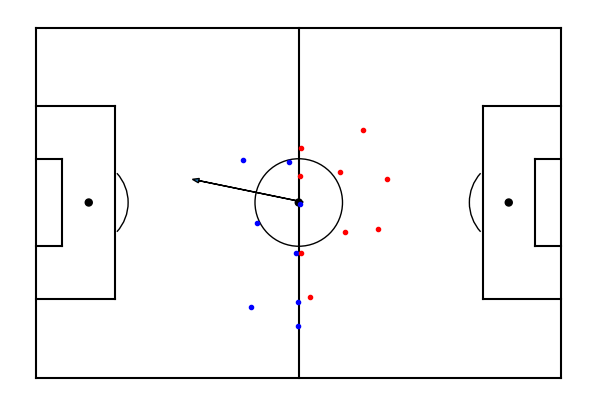

In [29]:
import matplotlib.pyplot as plt
import render_pitch

render_pitch.render_pitch()

plt.plot(
    [x for (x, y) in event_frames["location"].loc[event_frames["teammate"] == True]],
    [y for (x, y) in event_frames["location"].loc[event_frames["teammate"] == True]],
    "b.",
)
plt.plot(
    [x for (x, y) in event_frames["location"].loc[event_frames["teammate"] == False]],
    [y for (x, y) in event_frames["location"].loc[event_frames["teammate"] == False]],
    "r.",
)


def plt_arrow(start: tuple, end: tuple):
    plt.arrow(
        start[0],
        start[1],
        end[0] - start[0],
        end[1] - start[1],
        head_width=1,
        length_includes_head=True,
    )

plt_arrow(event["location"], event["pass_end_location"])

Interestingly, when we compare the plot to what actually happened, we notice that the pitch is reflected in the x-direction. We also don't have player positions for players that are off-screen.

![](../img/pass_1.png)